In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#  1) KNN implementation from scikit learn to classify the Iris dataset.

In [3]:
from sklearn import neighbors

import pylab as pl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [4]:
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [5]:
n_samples, n_features = iris.data.shape

print((n_samples, n_features))

(150, 4)


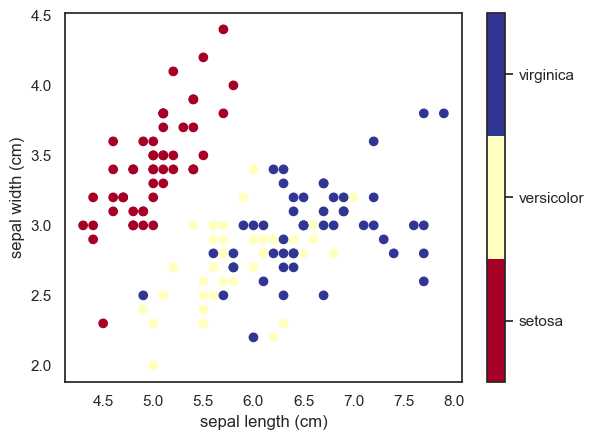

In [6]:
x_index = 0
y_index = 1

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])
plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
            
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index]);

In [7]:
X, y = iris.data, iris.target

clf = neighbors.KNeighborsClassifier(n_neighbors=5)

clf.fit(X, y)

KNeighborsClassifier()

In [8]:
result = clf.predict([[3, 5, 4, 2],])

print(iris.target_names[result])

['versicolor']


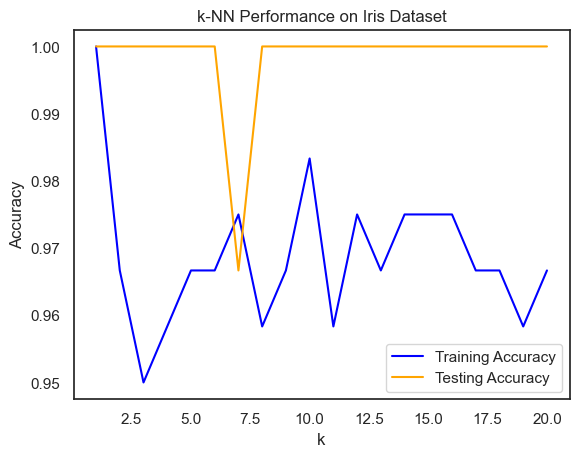

In [9]:
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of k values to test
k_values = list(range(1, 21))  # Test k from 1 to 20

# Initialize lists to store accuracy scores
train_accuracy = []
test_accuracy = []

# Iterate over different values of k
for k in k_values:
    # Initialize and train kNN classifier
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Predict on training set
    train_pred = knn.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_accuracy.append(train_acc)
    
    # Predict on test set
    test_pred = knn.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracy.append(test_acc)

plt.plot(k_values, train_accuracy, label='Training Accuracy', color='blue')
plt.plot(k_values, test_accuracy, label='Testing Accuracy', color='orange')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Performance on Iris Dataset')
plt.legend()

plt.show()

# 2) Own implementation for KNN with 4 different distance metrics

In [10]:
iris = datasets.load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
# Euclidean distance function
def dis(a, b, p=1):
    l = len(a)
    d = 0
    for i in range(l):
        d += abs(a[i] - b[i]) ** p
    d = d ** (1/p)
    return d

In [12]:
X = df.drop('target', axis=1)
y = df.target
test_pt = [4.8, 2.7, 2.5, 0.7]
distances = []
for i in X.index:
    a = dis(test_pt, X.iloc[i])
    distances.append(a)
dists = pd.DataFrame(data=distances, index=X.index, columns=['dist'])
dists.head()

,dist
0,2.7
1,2.0
2,2.3
3,2.1
4,2.7


In [13]:
def knn_sort(k,dists): return dists.sort_values(by = 'dist')[:k]

In [14]:
sorted_dists = knn_sort(5, dists)
print(sorted_dists)

count_set = {}
for i in sorted_dists.index:
    if y[i] not in count_set:
        count_set[y[i]] = 1
    else:
        count_set[y[i]] += 1

print(max(count_set))

    dist
98   1.4
57   1.5
93   1.7
24   1.8
30   1.8
1


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
def KNN(X_train, X_test, y_train, y_test, k, p):
    y_predict = []
    for test_pt in X_test:
        distances = []
        for i in X_train:
            a = dis(test_pt, i, p)
            distances.append(a)
        dists = pd.DataFrame(data=distances, index=y_train.index, columns=['dist'])
        sorted_dists = knn_sort(k, dists)
        #print(sorted_dists)
        count_set = {}
        for i in sorted_dists.index:
            if y_train[i] not in count_set:
                count_set[y_train[i]] = 1
            else:
                count_set[y_train[i]] += 1
        y_predict.append(max(count_set))
    y = y_test.tolist()
    accr = 0
    for i in range(len(y)):
        if y[i] == y_predict[i]:
            accr += 1
    return accr/len(y)
    #print('Accuracy',accr/len(y))

In [17]:
KNN(X_train, X_test, y_train, y_test, 5,1)

0.868421052631579

0.9736842105263158


Text(0, 0.5, 'Accuracy (%)')

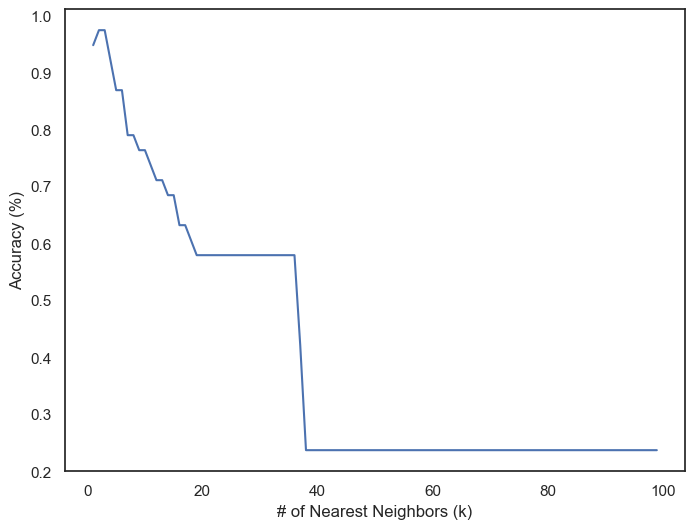

In [18]:
accuracies = []
for i in range(1,100):
    accuracies.append(KNN(X_train, X_test, y_train, y_test, i,1))

print(max(accuracies))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)')

# 3) Own implementation of Knn to any instance of Pima Indians Diabetes Database

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

In [20]:
diabetes_data = pd.read_csv('./diabetes.csv')

In [21]:
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [24]:
total = diabetes_data.isnull().sum().sort_values(ascending=False)
percent = ((diabetes_data.isnull().sum()/diabetes_data.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(9)

,Total,Percent
Insulin,374,48.697917
SkinThickness,227,29.557292
BloodPressure,35,4.557292
BMI,11,1.432292
Glucose,5,0.651042
Pregnancies,0,0.000000
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000
Outcome,0,0.000000


In [25]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


In [26]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

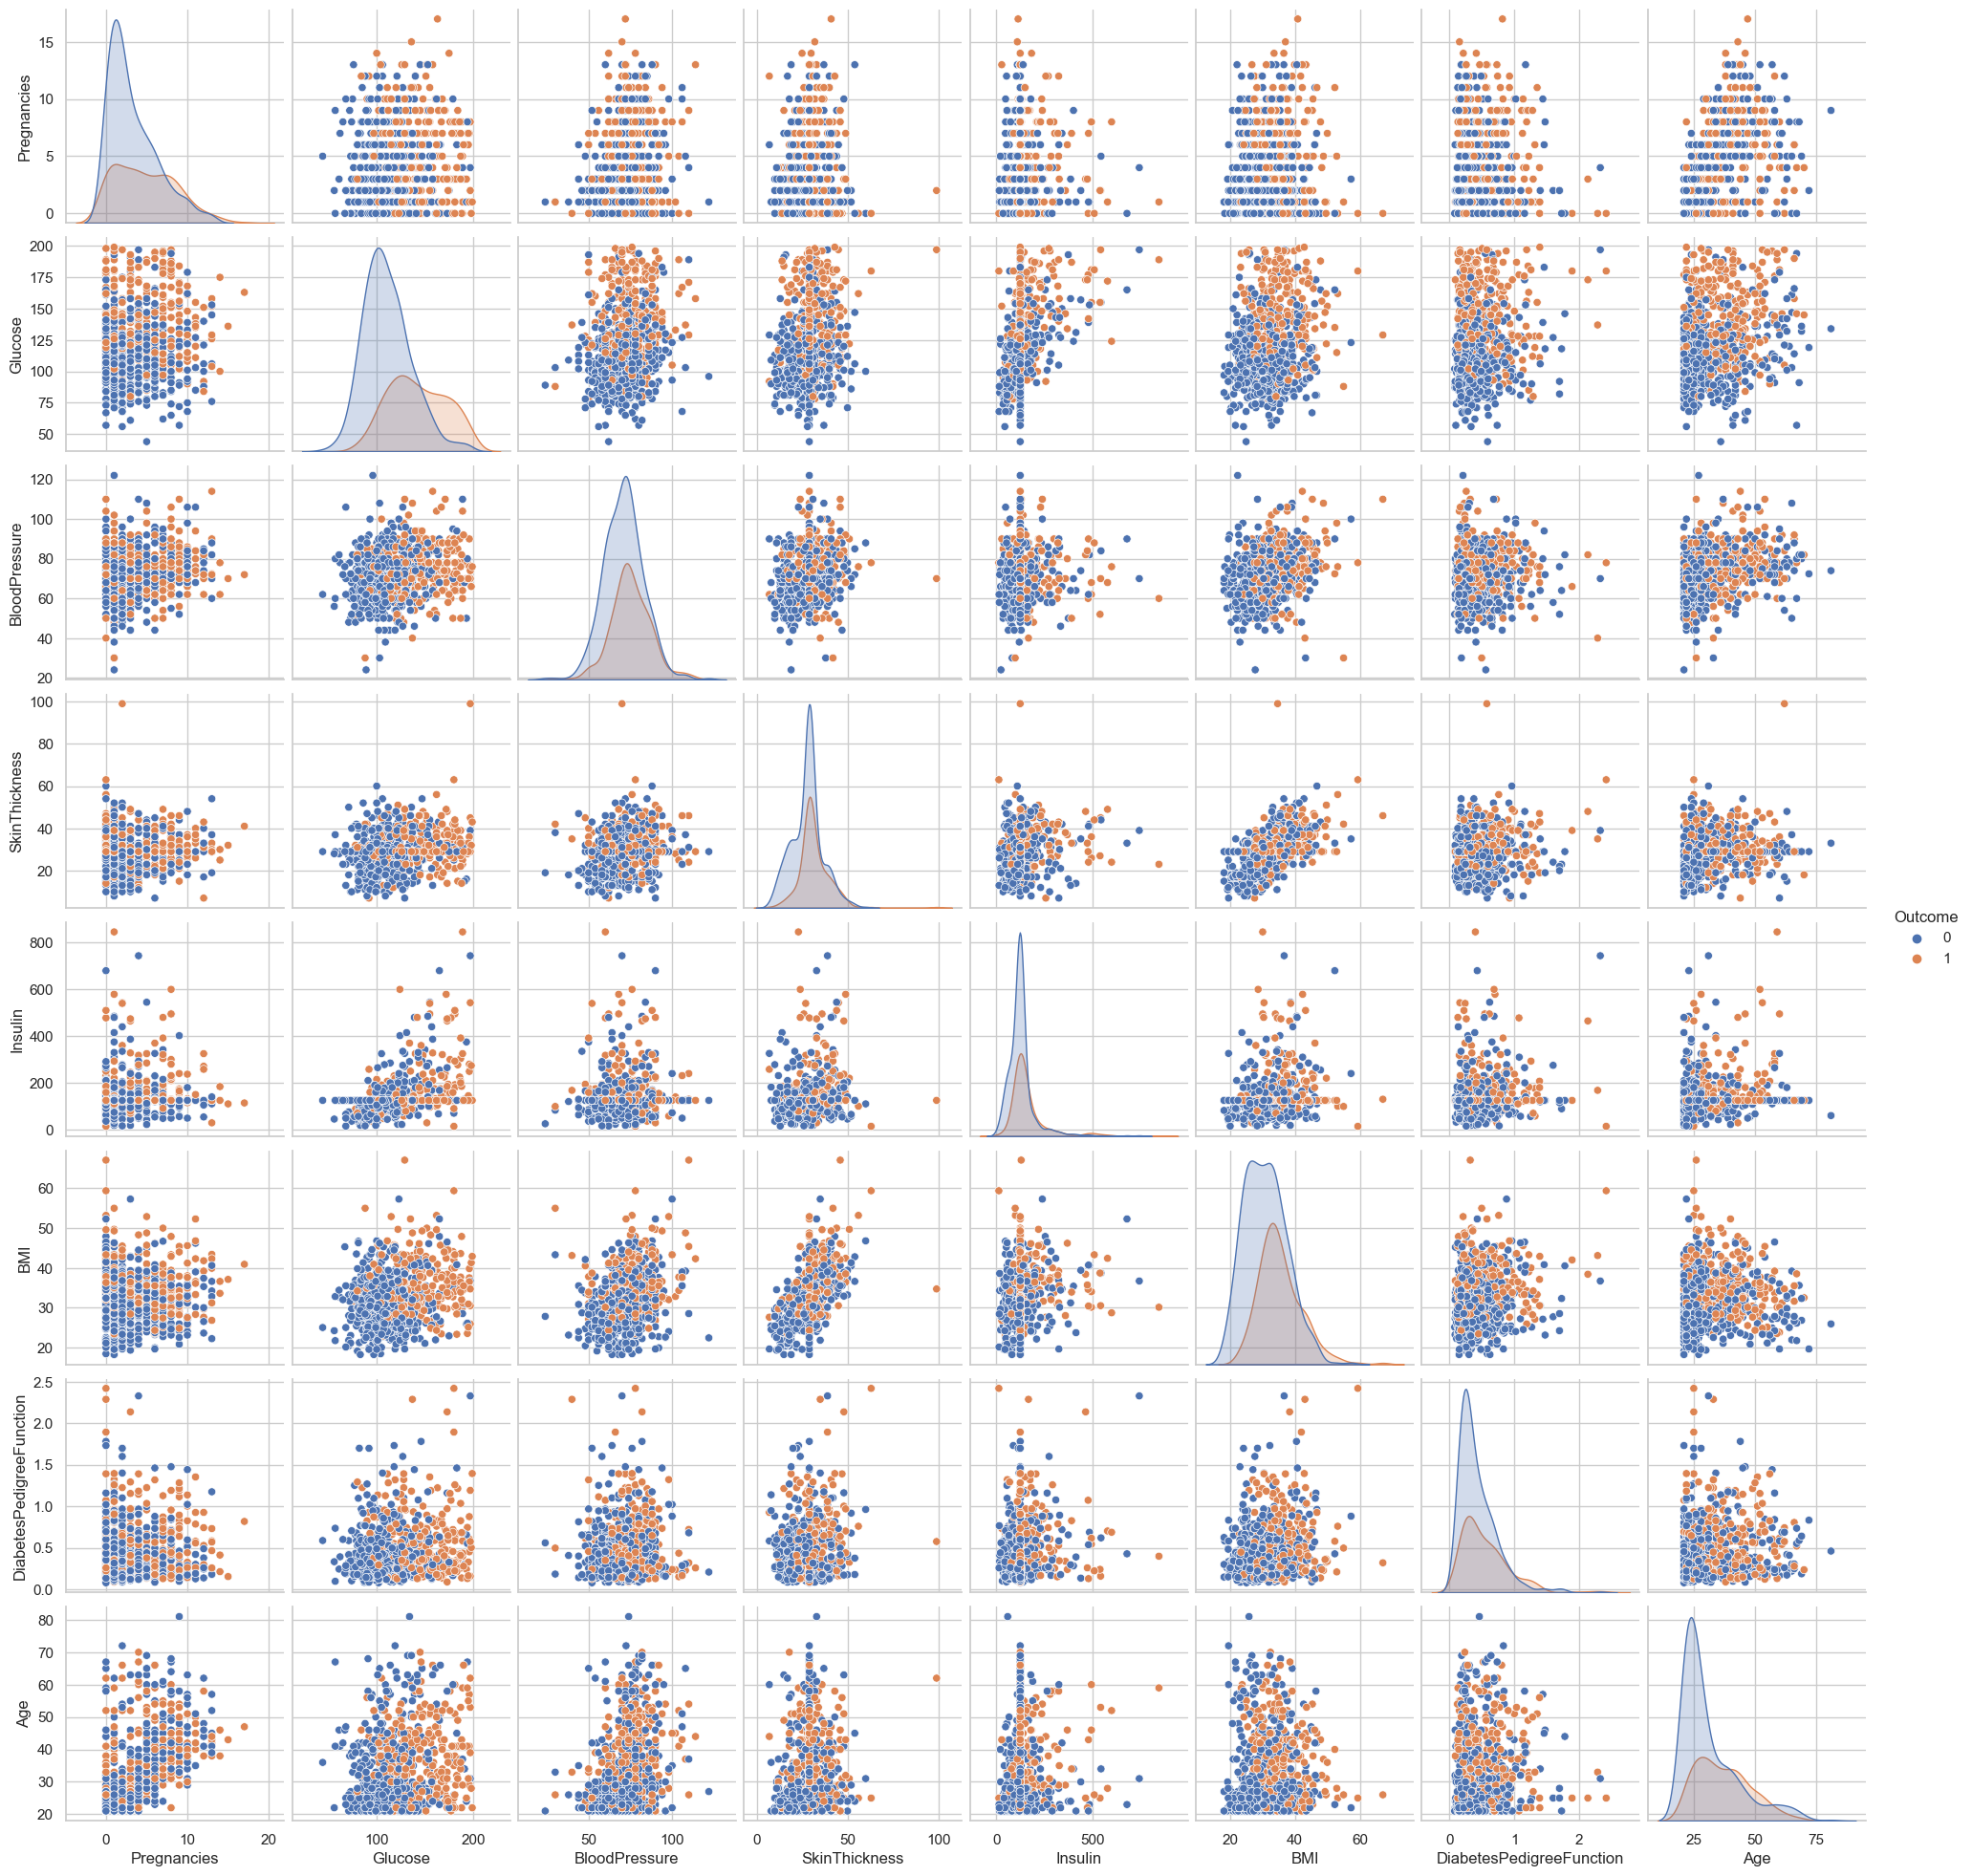

In [27]:
sns.pairplot(diabetes_data,hue='Outcome')

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [29]:
scaler.fit(diabetes_data.drop('Outcome',axis=1))

StandardScaler()

In [30]:
scaled_features = scaler.transform(diabetes_data.drop('Outcome',axis=1))

In [31]:
df_feat = pd.DataFrame(scaled_features,columns=diabetes_data.columns[:-1])

In [32]:
df_feat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,0.670643,0.316566,1.549303,5.484909,-0.020496


In [33]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,diabetes_data['Outcome'],
                                                    test_size=0.30,random_state=101)

In [34]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)

In [35]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [36]:
pred = knn.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

In [38]:
print(confusion_matrix(y_test,pred))

[[115  35]
 [ 29  52]]


In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       150
           1       0.60      0.64      0.62        81

    accuracy                           0.72       231
   macro avg       0.70      0.70      0.70       231
weighted avg       0.73      0.72      0.73       231



In [40]:
error_rate = []
test_scores = []
train_scores = []

# Will take some time
for i in range(1,40):
    
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    
    error_rate.append(np.mean(pred_i != y_test))
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

Text(0, 0.5, 'Error Rate')

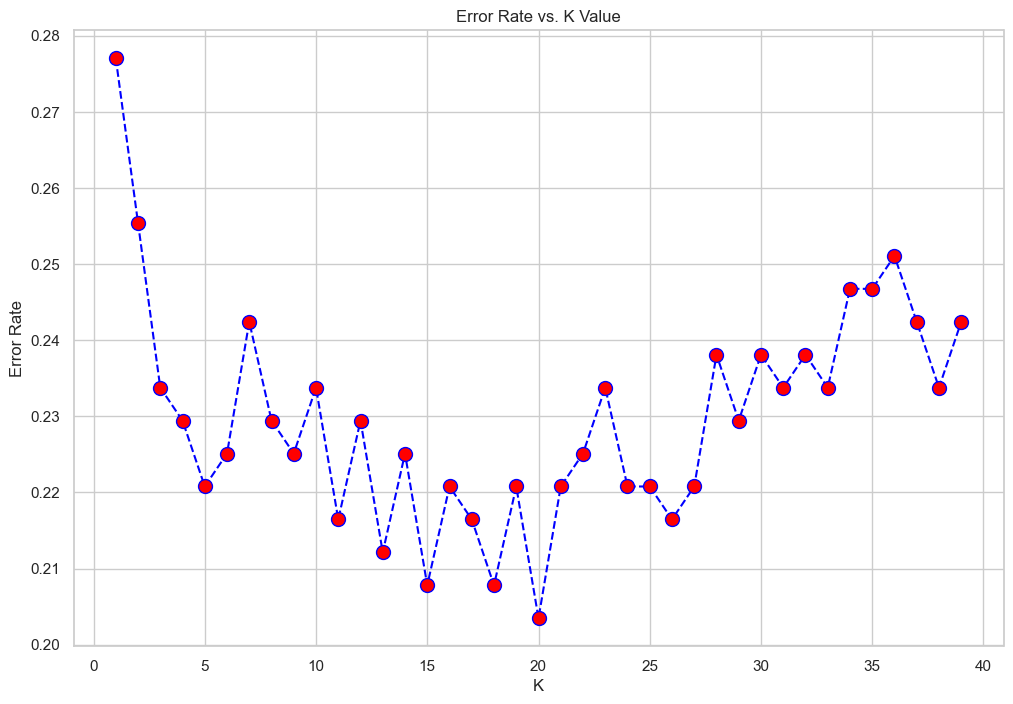

In [41]:
plt.figure(figsize=(12,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [42]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [43]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 79.65367965367966 % and k = [20]


In [44]:
# NOW WITH K=20
knn = neighbors.KNeighborsClassifier(n_neighbors=20)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=20')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=20


[[134  16]
 [ 31  50]]


              precision    recall  f1-score   support

           0       0.81      0.89      0.85       150
           1       0.76      0.62      0.68        81

    accuracy                           0.80       231
   macro avg       0.78      0.76      0.77       231
weighted avg       0.79      0.80      0.79       231



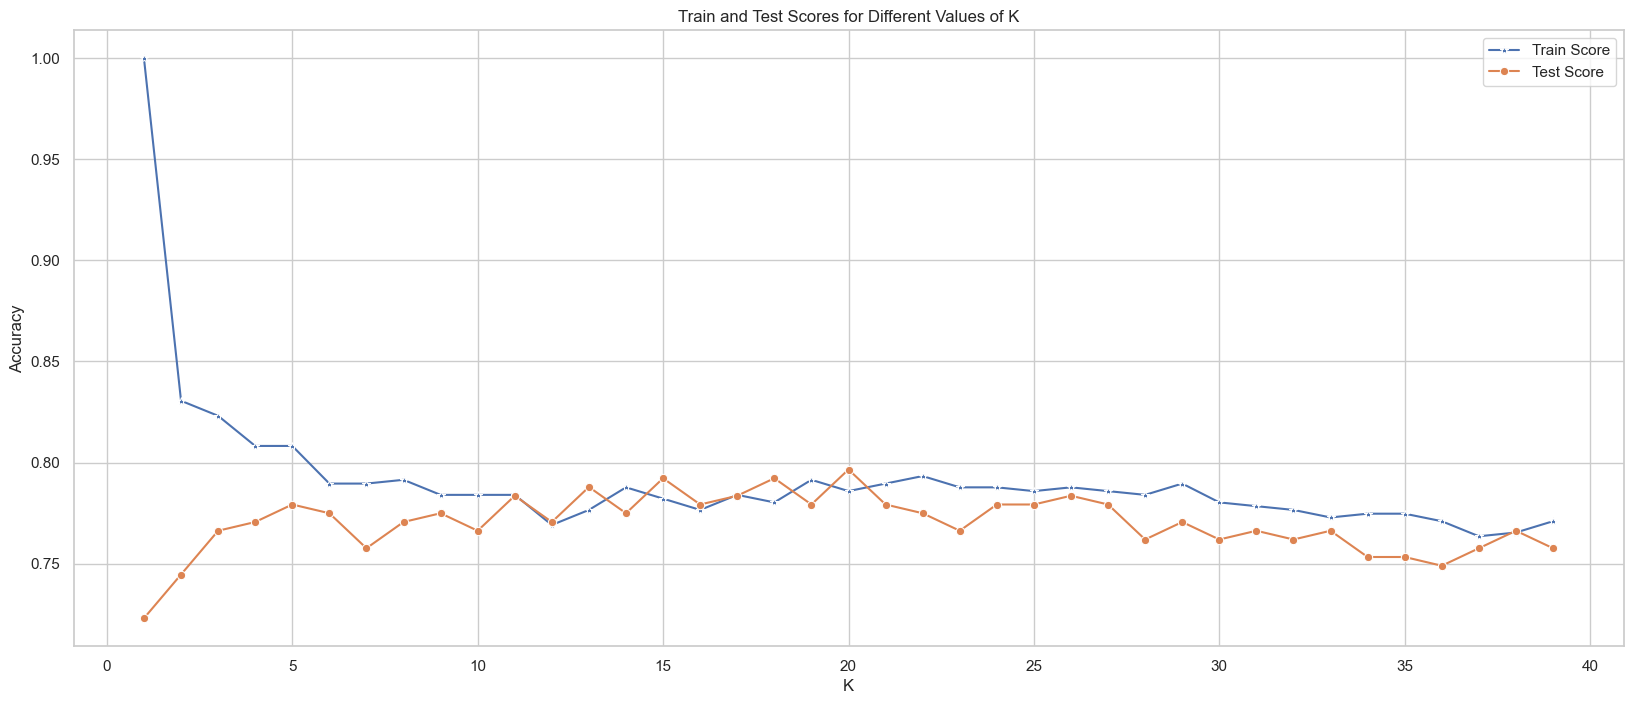

In [45]:
plt.figure(figsize=(20, 8))
sns.lineplot(x=range(1, 40), y=train_scores, marker='*', label='Train Score')
sns.lineplot(x=range(1, 40), y=test_scores, marker='o', label='Test Score')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Train and Test Scores for Different Values of K')
plt.legend()
plt.show()
